@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/hyDOCXMmXxc
# Clustering Jerárquico o Aglomerativo:
## Single-Linkage
### Módulos a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Contexto del Ejemplo y Datos
## Años en el mundo laboral y número de empleos

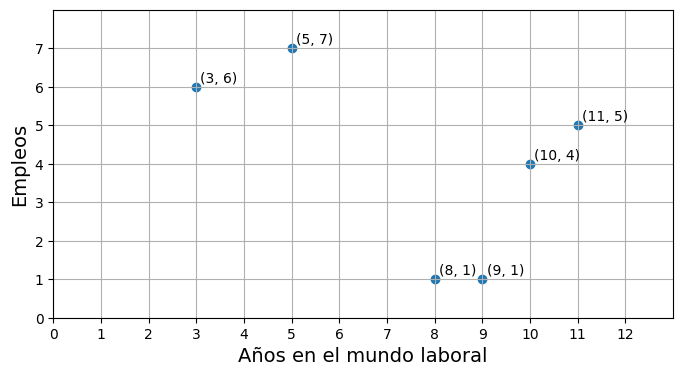

In [2]:
# Datos -> (años en el mundo laboral, número de empleos)
datos =  np.array([(3, 6), (5, 7),  (8, 1), (9, 1), (10, 4), (11, 5)])

# Coordenadas de los puntos (año, num_empleos)
x = datos[:, 0]
y = datos[:, 1]

# Gráfica de dispersión
plt.figure(figsize=(8, 4))
plt.scatter(x, y)
plt.xlabel("Años en el mundo laboral", size=14)
plt.ylabel("Empleos", size=14)

# Detalles de visualizacion
plt.xlim(0, 13)
plt.ylim(0, 8)
plt.xticks(range(0, 13))
plt.yticks(range(0, 8))
plt.grid(True)

# Imprimir coordenadas
for i in range(len(x)):
    plt.annotate(f"({x[i]}, {y[i]})", (x[i], y[i]),
                 textcoords="offset points", xytext=(3,3), ha="left")

plt.show()

 # Matriz de similitud entre puntos

In [3]:
# La métrica de similitud es "Similitud Coseno"
matriz_similitud = cosine_similarity(datos)
pd.DataFrame(matriz_similitud)

,0,1,2,3,4,5
0,1.000000,0.987763,0.554700,0.543251,0.747409,0.777245
1,0.987763,1.000000,0.677681,0.667545,0.841879,0.865865
2,0.554700,0.677681,1.000000,0.999906,0.967372,0.954662
3,0.543251,0.667545,0.999906,1.000000,0.963811,0.950495
4,0.747409,0.841879,0.967372,0.963811,1.000000,0.998937
5,0.777245,0.865865,0.954662,0.950495,0.998937,1.000000


# Matriz de Vinculación

In [4]:
# La matriz de vinculación se crea a partir de la matriz de similitud
mat_vincula = linkage(matriz_similitud, method="single")
pd.DataFrame(mat_vincula, columns=["Cluster A", "Cluster B", "Distancia", "Tamaño"])

,Cluster A,Cluster B,Distancia,Tamaño
0,2.0,3.0,0.016244,2.0
1,4.0,5.0,0.042504,2.0
2,0.0,1.0,0.218291,2.0
3,6.0,7.0,0.263610,4.0
4,8.0,9.0,0.511614,6.0


# Visualización de Dendrograma

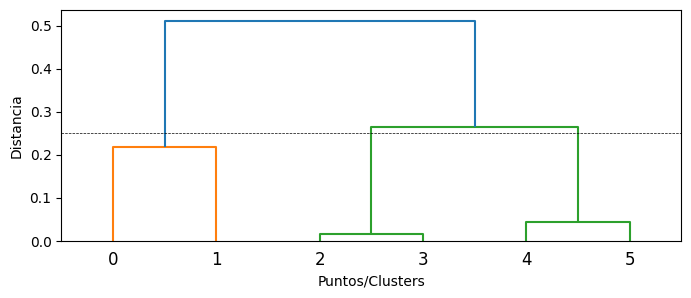

In [5]:
plt.figure(figsize=(8, 3))
plt.xlabel("Puntos/Clusters")
plt.ylabel("Distancia")
dendrogram(mat_vincula)
distancia_max = 0.25
plt.axhline(y=distancia_max, c="k", ls="--", lw=0.5)
plt.show()

# Visualización de los Clusters con Distancia de 0.25

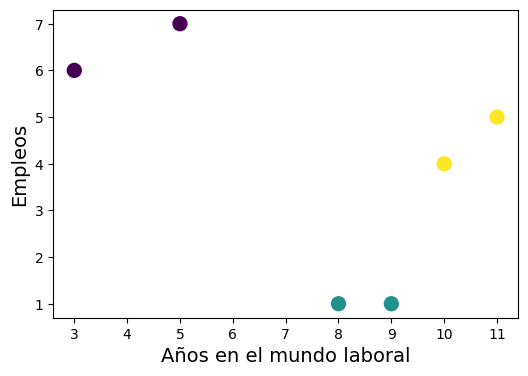

In [6]:
# Obtener los clusters a partir de una distancia máxima
clusters = fcluster(mat_vincula, distancia_max, criterion="distance")

# Gráfica de dispersión para graficar los clusters
plt.figure(figsize=(6, 4))
plt.scatter(x, y, c=clusters, s=100)
plt.xlabel("Años en el mundo laboral", size=14)
plt.ylabel("Empleos", size=14)
plt.show()

# Visualización de Dendrograma

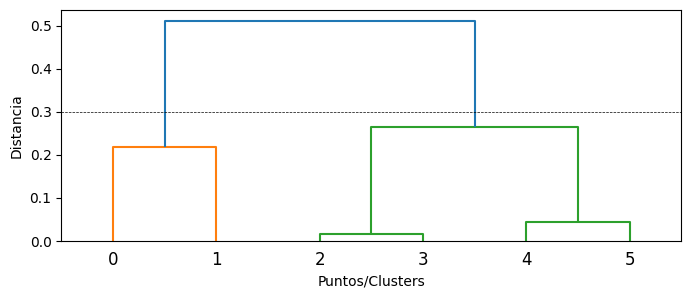

In [7]:
plt.figure(figsize=(8, 3))
plt.xlabel("Puntos/Clusters")
plt.ylabel("Distancia")
dendrogram(mat_vincula)
distancia_max = 0.3
plt.axhline(y=distancia_max, c="k", ls="--", lw=0.5)
plt.show()

# Visualización de los Clusters con Distancia de 0.3

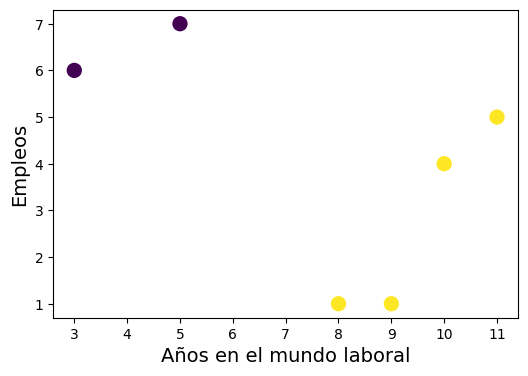

In [8]:
# Obtener los clusters a partir de una distancia máxima
clusters = fcluster(mat_vincula, distancia_max, criterion="distance")

# Gráfica de dispersión para graficar los clusters
plt.figure(figsize=(6, 4))
plt.scatter(x, y, c=clusters, s=100)
plt.xlabel("Años en el mundo laboral", size=14)
plt.ylabel("Empleos", size=14)
plt.show()